# Python для анализа данных

## ДЗ 4

*Придумывал: Ян Пиле, НИУ ВШЭ*  

## Задача 1

Дана страница https://ru.wikipedia.org/wiki/Премия_«Оскар»_за_лучший_фильм#Достижения_по_другим_номинациям_Оскара

Используя удобные для вас модули Python (Например requests, bs4 и pandas, но можно и любые другие) сгрузить в удобную для вас структуру данных (например pandas-табличку) данные о номинантах и победителях премии Оскар за лучший фильм за всю историю существования премии. Заметьте, на страничке эта информация в нескольких таблицах. По данным ответьте на вопросы. P.S. Результат нужно именно посчитать, если на странице в явном виде указан ответ на вопрос, просто выгрузить этот ответ нельзя:

    1. Сколько раз были номинированы фильмы, созданные при участии Стивена Спилберга?
    2. Фильмы какой компании получили больше Оскаров за лучший фильм: Warner Bros. или Paramount Pictures и насколько больше?

In [1]:
import pandas as pd
import requests

url_1 = 'https://ru.wikipedia.org/wiki/Премия_«Оскар»_за_лучший_фильм#Достижения_по_другим_номинациям_Оскара'

r_1 = requests.get(url_1)
wiki_1 = r_1.text

tables_1 = pd.read_html(wiki_1, encoding="UTF-8")
len(tables_1)

21

In [ ]:
# tables_1

In [2]:
tables_1[9]

,Год/Церемония,Фильм,Кинокомпания(и),Продюсер(ы),Ссылки
0,2011 (83-я),★ «Король говорит!»,The Weinstein Company,"Эмиль Шерман, Йен Каннинг, Гарет Анвин",[# 83]
1,2011 (83-я),«Чёрный лебедь»,Fox Searchlight Pictures,"Скотт Фрэнклин, Майк Медавой, Брайан Оливер",[# 83]
2,2011 (83-я),«Боец»,Paramount Pictures,"Дэвид Хоберман, Тодд Либерман, Марк Уолберг",[# 83]
3,2011 (83-я),«Начало»,Warner Bros.,"Кристофер Нолан, Эмма Томас",[# 83]
4,2011 (83-я),«Детки в порядке»,Focus Features,"Гари Гилберт, Джеффри Леви-Хайнт, Селин Рэттрэй",[# 83]
...,...,...,...,...,...
83,2020 (92-я),«Джокер»,NaN,"Тодд Филлипс, Брэдли Купер и Эмма Тиллинджер К...",NaN
84,2020 (92-я),«Маленькие женщины»,NaN,Эми Паскаль,NaN
85,2020 (92-я),«Брачная история»,NaN,Ноа Баумбах и Дэвид Хейман,NaN
86,2020 (92-я),«1917»,NaN,"Сэм Мендес, Пиппа Харрис, Джейн‑Энн Тенггрен и...",NaN


In [3]:
table_1 = pd.concat(tables_1[0:9])
table_1.reset_index(drop=True, inplace=True)
table_1.columns = ['year', 'movie', 'company', 'producer', 'links']
# table_1 = table.drop(['year', 'movie', 'links'], axis='columns')
table_1.head()

,year,movie,company,producer,links
0,1929 (1-я),★ «Крылья»,"Paramount Pictures, Famous Players-Lasky",Люсьен Хаббард,[# 1]
1,1929 (1-я),«Рэкет»,"Caddo, Paramount",Говард Хьюз,[# 1]
2,1929 (1-я),«Седьмое небо»,Fox Film Corporation,Уильям Фокс,[# 1]
3,1930-I (2-я),★ «Бродвейская мелодия»,Metro-Goldwyn-Mayer,"Ирвинг Талберг, Лоуренс Уэйнгартен",[# 2]
4,1930-I (2-я),«Алиби»,"Feature Productions, United Artists",Роланд Уэст,[# 2]


In [4]:
from collections import Counter

prod_lst = list([x for producer in [s.split(', ') for s in table_1['producer']] for x in producer])
c4_1 = Counter(prod_lst)
c4_1.most_common(11)

[('Хэл Б. Уоллис', 19),
 ('Дэррил Фрэнсис Занук', 14),
 ('Хенри Блэнк', 9),
 ('Сэмюэл Голдвин', 8),
 ('Дэвид Селзник', 8),
 ('Фрэнк Капра', 7),
 ('Джек Уорнер', 6),
 ('Ирвинг Тальберг', 6),
 ('Джордж Стивенс', 6),
 ('Стэнли Крамер', 6),
 ('Стивен Спилберг', 6)]

In [5]:
table_1[table_1['producer'].str.contains("Стивен Спилберг", na=True)]['movie'].count()

6

**6** раз были номинированы фильмы, созданные при участии Стивена Спилберга.

In [13]:
winners_df = table_1[table_1['movie'].str.contains("★", na=True)]
winners_df

,year,movie,company,producer,links
0,1929 (1-я),★ «Крылья»,"Paramount Pictures, Famous Players-Lasky",Люсьен Хаббард,[# 1]
3,1930-I (2-я),★ «Бродвейская мелодия»,Metro-Goldwyn-Mayer,"Ирвинг Талберг, Лоуренс Уэйнгартен",[# 2]
8,1930-II (3-я),★ «На западном фронте без перемен»,Universal,Карл Леммле-мл.,[# 3]
13,1931 (4-я),★ «Симаррон»,RKO Radio Pictures,Уильям Лебарон,[# 4]
18,1932 (5-я),★ «Гранд-отель»,Metro-Goldwyn-Mayer,Ирвинг Тальберг,[# 5]
...,...,...,...,...,...
445,2006 (78-я),★ «Столкновение»,Lions Gate Entertainment,"Пол Хаггис, Кэти Шульман",[# 78]
450,2007 (79-я),★ «Отступники»,Warner Bros.,Грэм Кинг,[# 79]
455,2008 (80-я),★ «Старикам тут не место»,"Miramax Films, Paramount Vantage","Скотт Рудин, Итан Коэн, Джоэл Коэн",[# 80]
460,2009 (81-я),★ «Миллионер из трущоб»,"Fox Searchlight, Warner Bros.",Кристиан Колсон,[# 81]


In [32]:
import re
comp_lst = list(i for s in winners_df['company'])
print(len(comp_lst))
#comp_lst  = [x for x in comp_lst if str(x) != 'nan']
for i in range(0,len(comp_lst)+1):
    print(comp_lst[i])
    pattern1 = re.findall(r"[\w.,\s]*Warner Bros.[\w.,\s]*", comp_lst[i])
 #   print(comp_lst[i])
#pattern1


82
0


TypeError: expected string or bytes-like object

In [10]:
comp_lst = list([x for company in [s.split(', ') for s in winners_df['company']] for x in company])
c4_2 = Counter(comp_lst)
c4_2.most_common(5)

[('Columbia Pictures', 12),
 ('United Artists', 12),
 ('Paramount Pictures', 9),
 ('Metro-Goldwyn-Mayer', 9),
 ('Warner Bros.', 9)]

Фильмы Warner Bros. получили на **26** Оскаров за лучший фильм больше чем фильмы Paramount Pictures. (72 против 46)

## Задача 2

Дана страница https://ru.wikipedia.org/wiki/Премия_«Оскар»_за_лучшую_женскую_роль

Используя удобные для вас модули Python (Например requests, bs4 и pandas, но можно и любые другие) сгрузить в удобную для вас структуру данных (например pandas-табличку) данные о номинантах и победителях премии Оскар за лучшую женскую роль за всю историю существования премии. Заметьте, на страничке эта информация в нескольких таблицах. По данным ответьте на вопросы. P.S. Результат нужно именно посчитать, если на странице в явном виде указан ответ на вопрос, просто выгрузить этот ответ нельзя:

    1. Какая актриса чаще всего номинировалась на Оскар?
    2. Насколько отличается количество номинаций самой часто номинировавшейся актрисы и второй по частоте?

In [ ]:
url_2 = 'https://ru.wikipedia.org/wiki/Премия_«Оскар»_за_лучшую_женскую_роль'
r_2 = requests.get(url_2)
wiki_2 = r_2.text

tables_2 = pd.read_html(wiki_2, encoding="UTF-8")
len(tables_2)

18

In [ ]:
# tables_2

In [ ]:
tables_2[2]

,Церемония,Фото лауреата,Актриса,Фильм(ы),Роль
0,1-я (1929),NaN,• Джанет Гейнор,«Седьмое небо»,Дайана
1,1-я (1929),NaN,• Джанет Гейнор,«Уличный ангел»,Анджела
2,1-я (1929),NaN,• Джанет Гейнор,«Восход солнца»,жена
3,1-я (1929),NaN,• Луиза Дрессер,«Корабль приплывает»,миссис Плезник
4,1-я (1929),NaN,• Глория Свенсон,«Сэди Томпсон»,Сэди Томпсон
5,2-я (1930-I),NaN,• Мэри Пикфорд,«Кокетка»,Норма Безант
6,2-я (1930-I),NaN,• Рут Чаттертон,«Мадам Икс»,Жаклин Флорио
7,2-я (1930-I),NaN,• Бетти Компсон,«Зазывала»,Кэрри
8,2-я (1930-I),NaN,• Джинн Иглс (посмертно),«Письмо»,Лесли Кросби
9,2-я (1930-I),NaN,• Коринна Гриффит,«Божественная леди»,леди Эмма Гамильтон


In [ ]:
table_2 = pd.concat(tables_2[2:11])
table_2.reset_index(drop=True, inplace=True)
table_2.columns = ['year', 'foto', 'actress', 'movie', 'role', 'drop_1', 'drop_2']
table_2 = table_2.drop(['foto', 'drop_1', 'drop_2'], axis='columns')
table_2['actress'].isna().sum()

0

In [ ]:
table_2.head()

,year,actress,movie,role
0,1-я (1929),• Джанет Гейнор,«Седьмое небо»,Дайана
1,1-я (1929),• Джанет Гейнор,«Уличный ангел»,Анджела
2,1-я (1929),• Джанет Гейнор,«Восход солнца»,жена
3,1-я (1929),• Луиза Дрессер,«Корабль приплывает»,миссис Плезник
4,1-я (1929),• Глория Свенсон,«Сэди Томпсон»,Сэди Томпсон


In [ ]:
table_2['actress'].value_counts().head(5)

• Мерил Стрип       13
• Кэтрин Хепбёрн    12
• Бетт Дейвис       11
• Грир Гарсон        7
• Джейн Фонда        6
Name: actress, dtype: int64

1. Мерил Стрип чаще всего номинировалась на Оскар.
2. Всего на одну отличается количество номинаций самой часто номинировавшейся актрисы и второй по частоте.

## Задача 3

Дана страница https://www.worldometers.info/world-population/world-population-by-year/

На ней представлены данные о росте численности населения Земли. Используя удобные для вас модули Python (Например requests, bs4 и pandas, но можно и любые другие) сгрузить в удобную для вас структуру данных (например pandas-табличку) необходимые данные и нарисовать графики ежегодного прироста городского населения и ежегодного прироста общего населения, начиная с 1951 года. Если вы сгрузили данные в pandas-dataframe, графики можно построить так:

In [ ]:
url_3 = 'https://www.worldometers.info/world-population/world-population-by-year/'
r_3 = requests.get(url_3)
website = r_3.text

tables_3 = pd.read_html(website, encoding="UTF-8")
len(tables_3)

1

In [ ]:
df = tables_3[0]
df

,Year,World Population,YearlyChange,NetChange,Density(P/Km²),UrbanPop,UrbanPop %
0,2020,7794798739,1.05 %,81330639.0,52.0,4.378994e+09,56 %
1,2019,7713468100,1.08 %,82377060.0,52.0,4.299439e+09,56 %
2,2018,7631091040,1.10 %,83232115.0,51.0,4.219817e+09,55 %
3,2017,7547858925,1.12 %,83836876.0,51.0,4.140189e+09,55 %
4,2016,7464022049,1.14 %,84224910.0,50.0,4.060653e+09,54 %
...,...,...,...,...,...,...,...
89,-1000,50000000,NaN,NaN,NaN,NaN,NaN
90,-2000,27000000,NaN,NaN,NaN,NaN,NaN
91,-3000,14000000,NaN,NaN,NaN,NaN,NaN
92,-4000,7000000,NaN,NaN,NaN,NaN,NaN


In [ ]:


df.dropna(inplace=True)
import re
search = []    
for values in df['YearlyChange']:
    search.append(re.search(r'\d\.\d+', values).group())

df['Change'] = search
df

,Year,World Population,YearlyChange,NetChange,Density(P/Km²),UrbanPop,UrbanPop %,Change
0,2020,7794798739,1.05 %,81330639.0,52.0,4.378994e+09,56 %,1.05
1,2019,7713468100,1.08 %,82377060.0,52.0,4.299439e+09,56 %,1.08
2,2018,7631091040,1.10 %,83232115.0,51.0,4.219817e+09,55 %,1.10
3,2017,7547858925,1.12 %,83836876.0,51.0,4.140189e+09,55 %,1.12
4,2016,7464022049,1.14 %,84224910.0,50.0,4.060653e+09,54 %,1.14
...,...,...,...,...,...,...,...,...
65,1955,2773019936,1.77 %,48173195.0,19.0,8.770088e+08,32 %,1.77
66,1954,2724846741,1.76 %,47237781.0,18.0,8.501791e+08,31 %,1.76
67,1953,2677608960,1.78 %,46747398.0,18.0,8.242900e+08,31 %,1.78
68,1952,2630861562,1.81 %,46827301.0,18.0,7.992825e+08,30 %,1.81


In [ ]:
# import pandas as pd
# data = {'dt':['2020-01-01','2020-02-01','2020-03-01','2020-04-01','2020-05-01'],
# 'value':[1233, 23142,11445,32555,22234]}
# df = pd.DataFrame(data)
# df

,dt,value
0,2020-01-01,1233
1,2020-02-01,23142
2,2020-03-01,11445
3,2020-04-01,32555
4,2020-05-01,22234


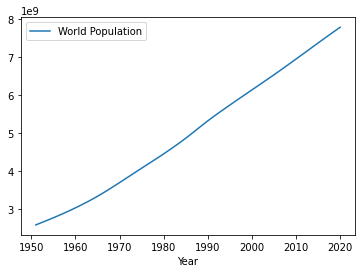

In [ ]:
p = df.plot(x='Year', y='World Population')